Block Maxima and Peaks Over Threshold Analysis

In [4]:
# EVT + dependencies for Anaconda kernel
!pip install yfinance pandas matplotlib seaborn scipy evt

# Install lmoments3 from GitHub
!pip install git+https://github.com/OpenHydrology/lmoments3.git

# Install scikit-extremes (GEV support)
!git clone https://github.com/kikocorreoso/scikit-extremes.git
%cd scikit-extremes
!pip install -e .
%cd ..

# Install thresholdmodeling (GPD support)
!git clone https://github.com/iagolemos1/thresholdmodeling.git
%cd thresholdmodeling
!pip install -e .
%cd ..


  Cloning https://github.com/OpenHydrology/lmoments3.git to /private/var/folders/6v/1zrv_7_d0zzd8j18ssjr64ch0000gn/T/pip-req-build-xnihsxwf
  Running command git clone --filter=blob:none --quiet https://github.com/OpenHydrology/lmoments3.git /private/var/folders/6v/1zrv_7_d0zzd8j18ssjr64ch0000gn/T/pip-req-build-xnihsxwf
  Resolved https://github.com/OpenHydrology/lmoments3.git to commit 7e19f97c23019ca68cbd526b8bd417c412438f1c
  Preparing metadata (setup.py) ... done
fatal: destination path 'scikit-extremes' already exists and is not an empty directory.
/Users/scottyap/Documents/M2R_EVT/scikit-extremes
Obtaining file:///Users/scottyap/Documents/M2R_EVT/scikit-extremes
  Preparing metadata (setup.py) ... done
  Attempting uninstall: scikit-extremes
    Found existing installation: scikit-extremes 0.0.1
    Uninstalling scikit-extremes-0.0.1:
      Successfully uninstalled scikit-extremes-0.0.1
  Running setup.py develop for scikit-extremes
/Users/scottyap/Documents/M2R_EVT
fatal: destin

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ExtremeLy import extremely as ely

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


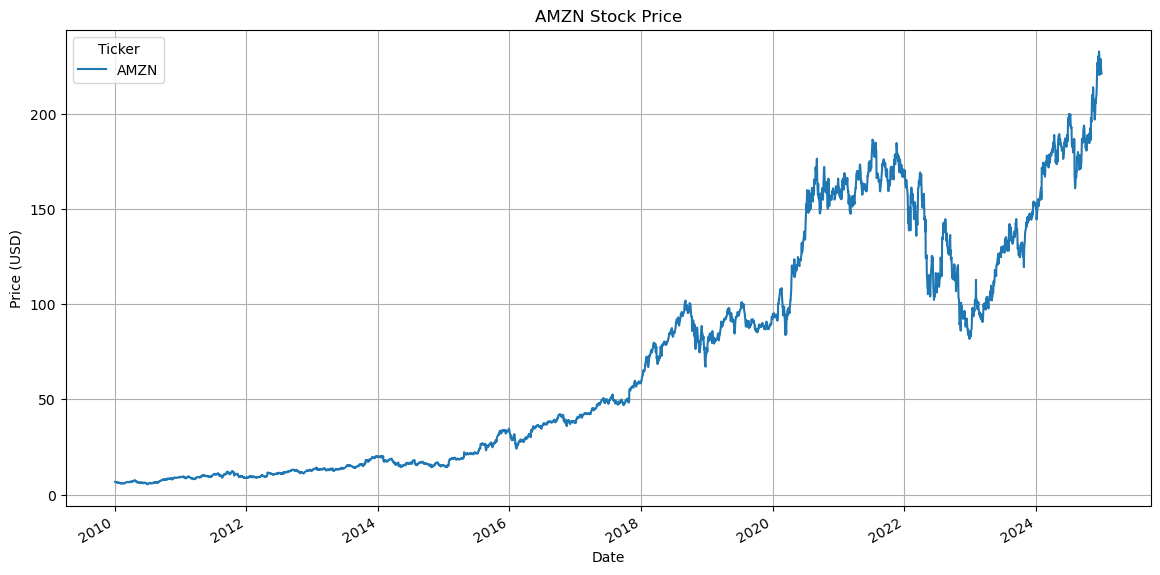

In [7]:
# Example: Download data for Amazon (AMZN) from 2010 to 2024
def download_stock_data(ticker, start_date, end_date):
    """
    Download stock data from Yahoo Finance.
    
    :param ticker: Stock ticker symbol
    :param start_date: Start date in 'YYYY-MM-DD' format
    :param end_date: End date in 'YYYY-MM-DD' format
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
ticker = 'AMZN'
start_date = '2010-01-01'
end_date = '2024-12-31'
AMZN_data = download_stock_data(ticker, start_date, end_date)

AMZN_data.head()
AMZN_data['Close'].plot(title=f'{ticker} Stock Price', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

`data.pct_change()` calculates the **daily percentage return**:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Where:  
- \( P_t \) is today's price  
- \( P_{t-1} \) is yesterday’s price

`.dropna()` removes the first `NaN` value that results from the initial shift (since there's no previous day to compare for the first row).


<Figure size 1000x400 with 0 Axes>

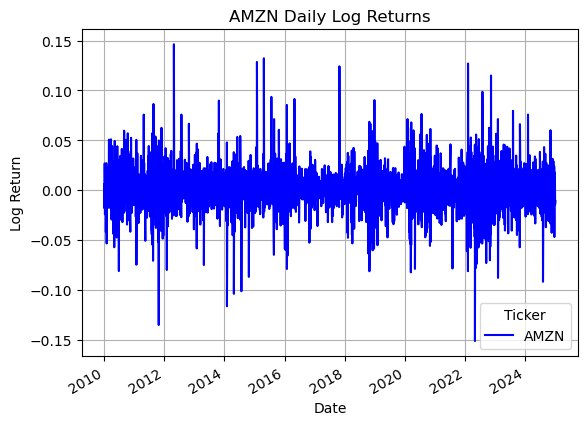

In [8]:
# Download just the 'Close' price
data = AMZN_data['Close'].dropna()

# Compute log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Plot clean log returns
plt.figure(figsize=(10, 4))
log_returns.plot(title="AMZN Daily Log Returns", color='blue')
plt.ylabel("Log Return")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [9]:
extreme_losses = -log_returns  # flip so that losses are positive

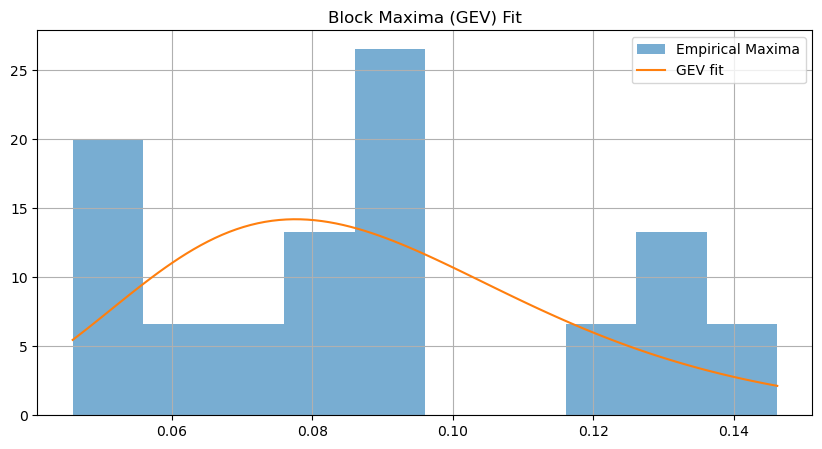

In [ ]:
maxima=ely.getBM(sample=extreme_losses,period="Y") 
maxima

In [13]:
from scipy.stats import genpareto as gpd

threshold = log_returns.quantile(0.95)
exceedances = (log_returns[log_returns > threshold] - threshold).dropna()


# Fit GPD
shape, loc, scale = gpd.fit(exceedances)

# Plot GPD over histogram of excesses
x = np.linspace(min(exceedances), max(exceedances), 100)
pdf = gpd.pdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(10, 5))
plt.hist(exceedances, bins=30, density=True, alpha=0.6, label='Exceedances')
plt.plot(x, pdf, label='GPD fit')
plt.title("Peaks Over Threshold (GPD) Fit")
plt.legend()
plt.grid(True)
plt.show()


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None